# Calculate the Marshall SAM Index

This is a test to see if my calculation of the marshall SAM index is the same as the published version

Idea stolen from nicki

https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import utils.pslIndex as psl

In [2]:
import xarray
import pandas as pd

In [3]:
#Idea stolen from nicki
#https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

url_40 = 'http://www.nerc-bas.ac.uk/public/icd/gjma/l40.1957.2007.txt'
url_65 = 'http://www.nerc-bas.ac.uk/public/icd/gjma/l65.1957.2007.txt'
url_SAMindex = 'http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt'

# import 40°S and 65°S data into pandas
m40 = pd.read_csv(url_40, sep='\s+', header=0, index_col=0, skipinitialspace=True)
m65 = pd.read_csv(url_65, sep='\s+', header=0, index_col=0, skipinitialspace=True)

# import the actual SAM index Marshall calculates
M03_SAMindex = pd.read_csv(url_SAMindex, sep=' ', skipinitialspace=True)


In [4]:
# define an xarray of dates based on the imported data set.
# start at the first year (1957)
# finish at the last year (2021)
# dates are 1 month apart

dates = xarray.cftime_range(
    start=str(m40.index[0]), 
    end=str(m40.index[-1])+'-12-01', 
    freq="MS", 
    calendar="noleap")

In [5]:
# define some xarray datasets to put data in
ds40=xarray.Dataset()
ds65=xarray.Dataset()

# add data in the same format as if it were imported from CESM
ds40['PSL']=xarray.DataArray(m40.to_numpy().flatten(), coords=[dates], dims=['time'], name="Marshall P40")
ds65['PSL']=xarray.DataArray(m65.to_numpy().flatten(), coords=[dates], dims=['time'], name="Marshall P60")

In [6]:
# calculate the index

samIndex=psl.normalisePSL(ds40, 1971, 2000)-psl.normalisePSL(ds65, 1971, 2000)
samIndex.rename('sam')

<xarray.DataArray 'sam' (time: 780)>
array([-8.85708764e-01, -2.30872746e+00,  6.74059116e-02, -2.00026342e+00,
       -2.54282213e+00, -8.86544549e-01,  1.01562075e+00, -1.75578610e+00,
        7.34103738e-01, -3.17711504e+00, -5.51077747e+00, -2.67541130e+00,
        3.94520793e-02, -2.88830157e+00, -2.56613693e+00, -3.05594746e-01,
       -2.77081939e+00, -9.82249742e-01, -1.67659545e+00,  9.88124202e-01,
        1.93304619e+00, -1.57701993e-01,  3.02287885e-01,  8.38532555e-01,
        1.61684927e+00, -1.91597874e-01, -5.53784279e-01, -1.27247283e+00,
       -3.23751167e-01, -1.13418780e+00,  1.81875330e-01, -1.67162201e+00,
        2.50620561e+00, -4.71157813e-01,  3.33631153e+00, -3.87217546e-01,
        9.11247843e-01,  8.63957788e-01,  3.45812636e+00, -3.61006396e-01,
       -6.11369147e-01, -1.76311738e-01,  3.13737734e-01,  4.42228902e-01,
        1.43651102e+00, -1.18777266e+00,  1.20435196e+00,  1.38750102e+00,
        9.29990560e-01, -4.06975408e+00, -4.06767388e-01, -1.38556102e-01,
        1.14398390e+00, -4.05061630e-01,  9.94236302e-01,  1.12074598e+00,
       -1.23163031e+00,  1.66565309e+00,  1.54327118e+00,  2.36307480e+00,
        2.38499763e+00, -5.13365520e-01, -6.71903800e-01,  1.68284233e+00,
       -6.69447626e-01, -3.46410792e+00,  3.34269324e-01, -2.07651766e-01,
       -1.51166096e-01, -3.66871485e-01, -2.29341310e+00,  1.37564275e+00,
        3.31640483e+00,  1.43468865e+00,  2.05994282e+00,  1.43717324e+00,
       -1.11217804e+00,  1.84885193e+00,  4.13438761e-01, -5.12056375e+00,
...
        4.16397743e-01,  2.45516590e+00,  2.03056797e+00,  1.89650099e+00,
        1.94578385e+00, -6.76000950e-01,  1.48047219e+00,  7.29662609e-01,
        3.18249364e+00,  1.37726393e+00,  4.43097409e+00,  1.08238691e+00,
       -9.38293281e-01,  3.71764287e+00,  8.23715837e-01, -1.29903000e+00,
        2.50356486e+00, -9.09001929e-01, -3.17129397e+00, -1.54416819e+00,
       -1.14008970e+00, -1.10912980e+00, -1.58433426e+00,  1.68026061e+00,
        1.85420599e+00,  2.01434079e+00,  1.57825785e-01,  3.17551856e-01,
        4.22389475e-01, -6.53063533e-01,  3.23783012e+00,  1.46789113e+00,
        2.76826974e+00,  1.03692331e+00, -3.11007299e-02, -1.69093128e+00,
        7.11864381e-03, -1.60005408e+00,  5.61999488e-01, -7.90049050e-01,
        1.85829281e+00,  2.80505924e+00,  2.89051605e+00,  1.46950607e+00,
        2.83987661e+00, -1.89723416e+00,  1.49519959e+00,  8.77188766e-01,
       -1.16733287e-01,  2.24678380e+00, -2.24047664e+00, -2.07038690e+00,
        8.25465763e-01, -2.00245543e+00, -4.49087577e+00, -1.80710252e+00,
        5.82511630e-01, -3.67651928e-01,  2.08548627e+00, -1.74534094e+00,
        1.04634605e+00,  1.19752325e+00, -9.86712050e-01, -2.23892540e+00,
       -2.49413140e-01,  1.81687438e+00,  1.15761520e+00,  2.32025354e+00,
        1.98110346e+00,  2.22478221e+00, -9.62174038e-01,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan])
Coordinates:
  * time     (time) object 1957-01-01 00:00:00 ... 2021-12-01 00:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

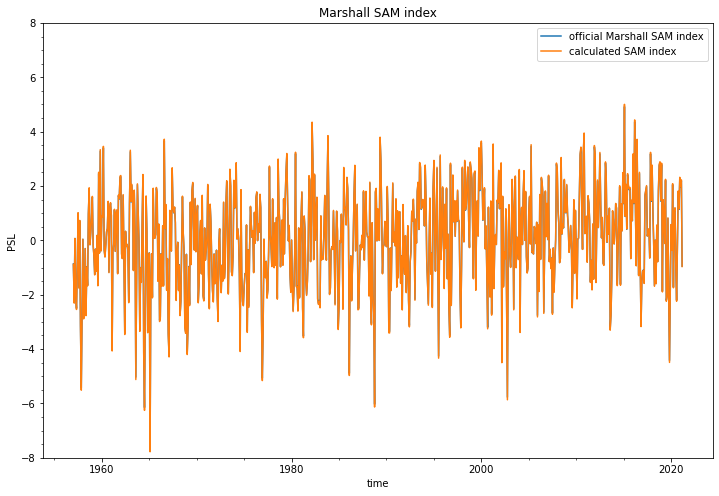

In [7]:
# Plot of the imported Marshall data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
# I am using the same dates I used for the imported PSL, maybe I should calculate them some other way?
plt.plot(dates, M03_SAMindex.to_numpy().flatten(), label='official Marshall SAM index')

#Add the calculated sam index to the same plot
samIndex.plot(ax=ax, label='calculated SAM index')

#Tidy up a bit
plt.title("Marshall SAM index")
plt.ylim(-8,8)
plt.minorticks_on()
plt.legend()
